Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path('images/')
path.ls()

[PosixPath('images/notmalware'), PosixPath('images/malware')]

In [4]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224).normalize(imagenet_stats)

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jcasey/.cache/torch/checkpoints/resnet34-333f7ec4.pth


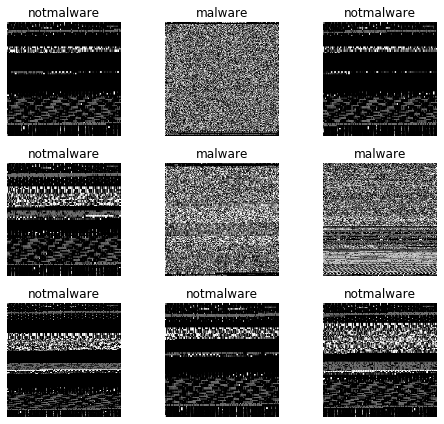

In [8]:
data.show_batch(rows=3, figsize=(7, 6))

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.529572,0.328309,0.083851,01:32
1,0.300573,0.213796,0.065217,01:34
2,0.203678,0.069791,0.034161,01:33
3,0.149652,0.074186,0.034161,01:30


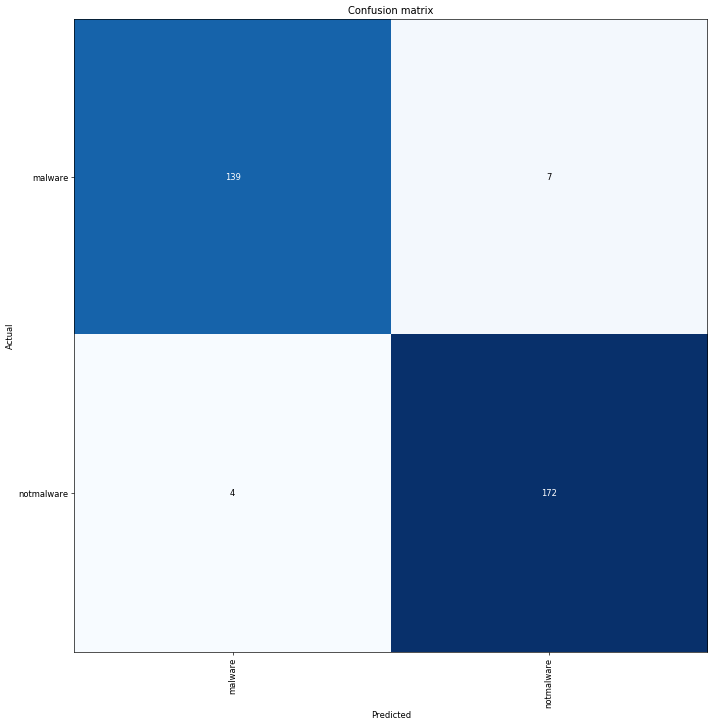

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


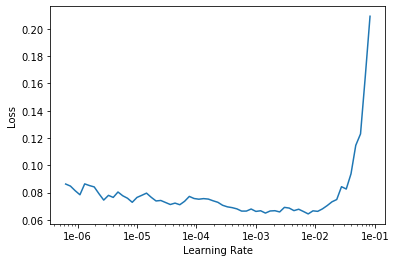

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.091357,0.114968,0.049689,02:31
1,0.061477,0.071381,0.031056,02:25
2,0.042389,0.075170,0.034161,02:27


In [15]:
learn.export(file = Path("./export1.pkl"))

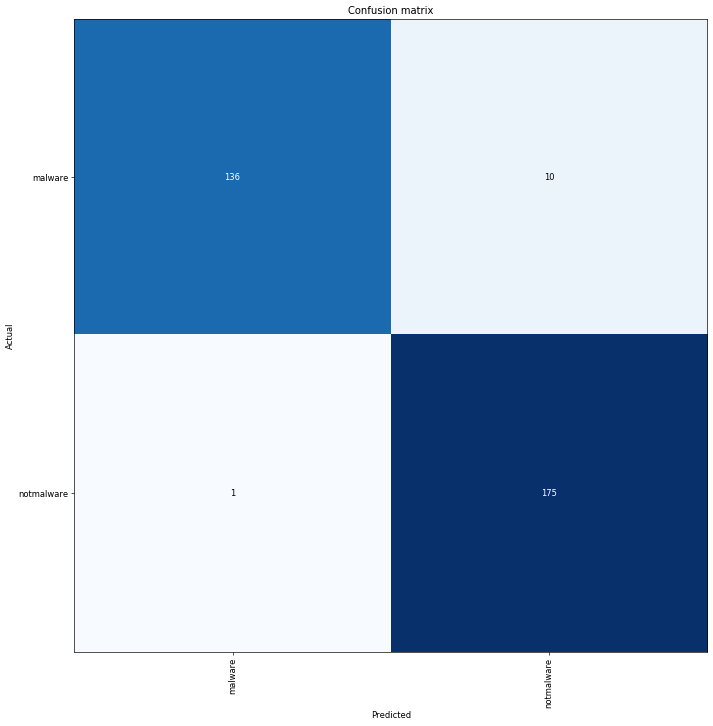

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)